# KNN
## Modelo de Regresión

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
train_data=pd.read_csv("../../train.csv", encoding="latin1")
columnas_aUsar = ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
                  "TotalBsmtSF", "GrLivArea", "GarageCars", 'WoodDeckSF',
                  "FullBath"]
_train = train_data[columnas_aUsar]

y = train_data["SalePrice"]
X = _train

print("Columnas usadas (" + str(len(_train.columns)) + ") :\n"+ str(_train.columns))

Columnas usadas (9) :
Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'WoodDeckSF', 'FullBath'],
      dtype='object')


In [4]:
# Separación de datos (entrenamiento y pruebas)
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 9)
(438, 9)
(1021,)
(438,)


In [5]:
#Normalización de datos
scalerB = StandardScaler()  # Crear el escalador

X_train_scaled = scalerB.fit_transform(X_train)
X_test_scaled = scalerB.transform(X_test)

In [ ]:
# Crear y entrenar el modelo
modelo = KNeighborsRegressor()
modelo.fit(X_train_scaled,y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test_scaled)

In [ ]:
# Evaluación en el conjunto de prueba
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE en test: {rmse}")
print(f"R² en test: {r2}")

RMSE en test: 35559.27098445032
R² en test: 0.8137482181350053


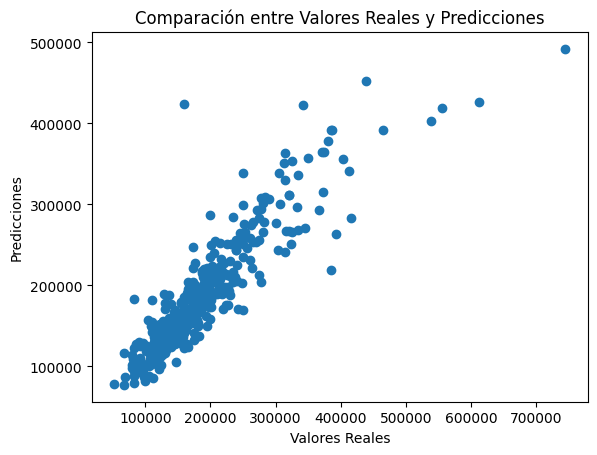

In [ ]:
# Visualización de errores
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre Valores Reales y Predicciones")
plt.show()

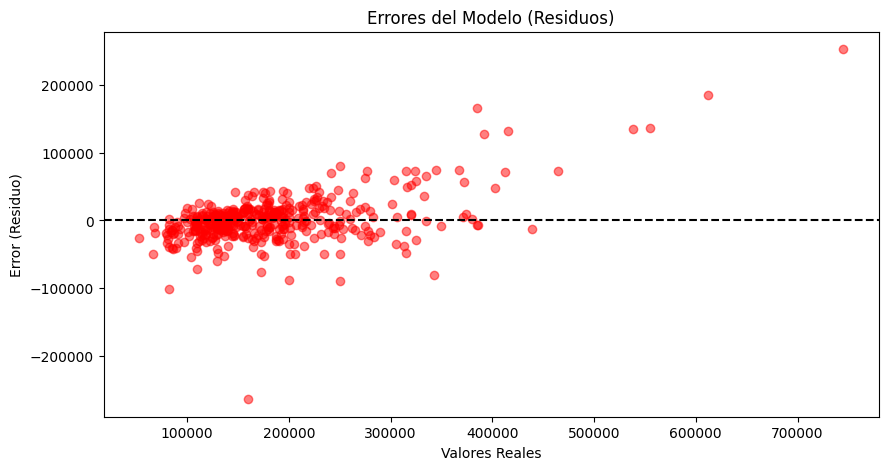

In [ ]:
plt.figure(figsize=(10,5))
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Error (Residuo)")
plt.title("Errores del Modelo (Residuos)")
plt.show()

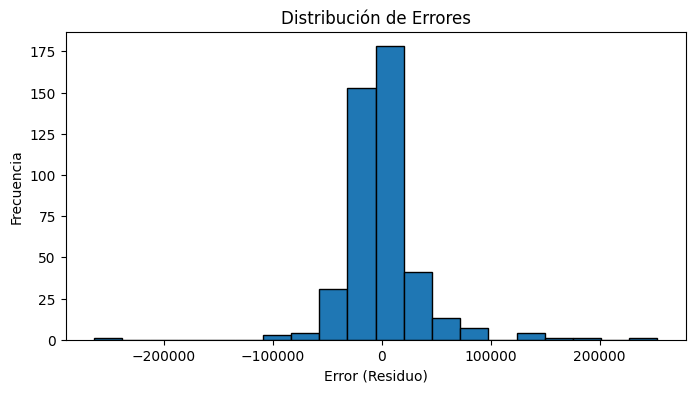

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel("Error (Residuo)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores")
plt.show()

## Valores de los hiperparámetros modificados

In [10]:
# Definir la cuadrícula de parámetros
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # p=1 para distancia Manhattan, p=2 para distancia Euclidiana
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    KNeighborsRegressor(),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ajustar el modelo
grid_search.fit(X_train_scaled, y_train)

# Imprimir los mejores parámetros
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo
best_knn = grid_search.best_estimator_

# Predecir con el mejor modelo
y_pred = best_knn.predict(X_test_scaled)

# Evaluar el modelo optimizado
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nResultados con el mejor modelo:")
print(f"RMSE optimizado: {rmse}")
print(f"R² optimizado: {r2}")

Mejores parámetros encontrados:
{'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

Resultados con el mejor modelo:
RMSE optimizado: 33534.09399051837
R² optimizado: 0.834358981073425


Mejores parámetros: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
R² con los mejores parámetros: 0.8344
RMSE con los mejores parámetros: 33534.09


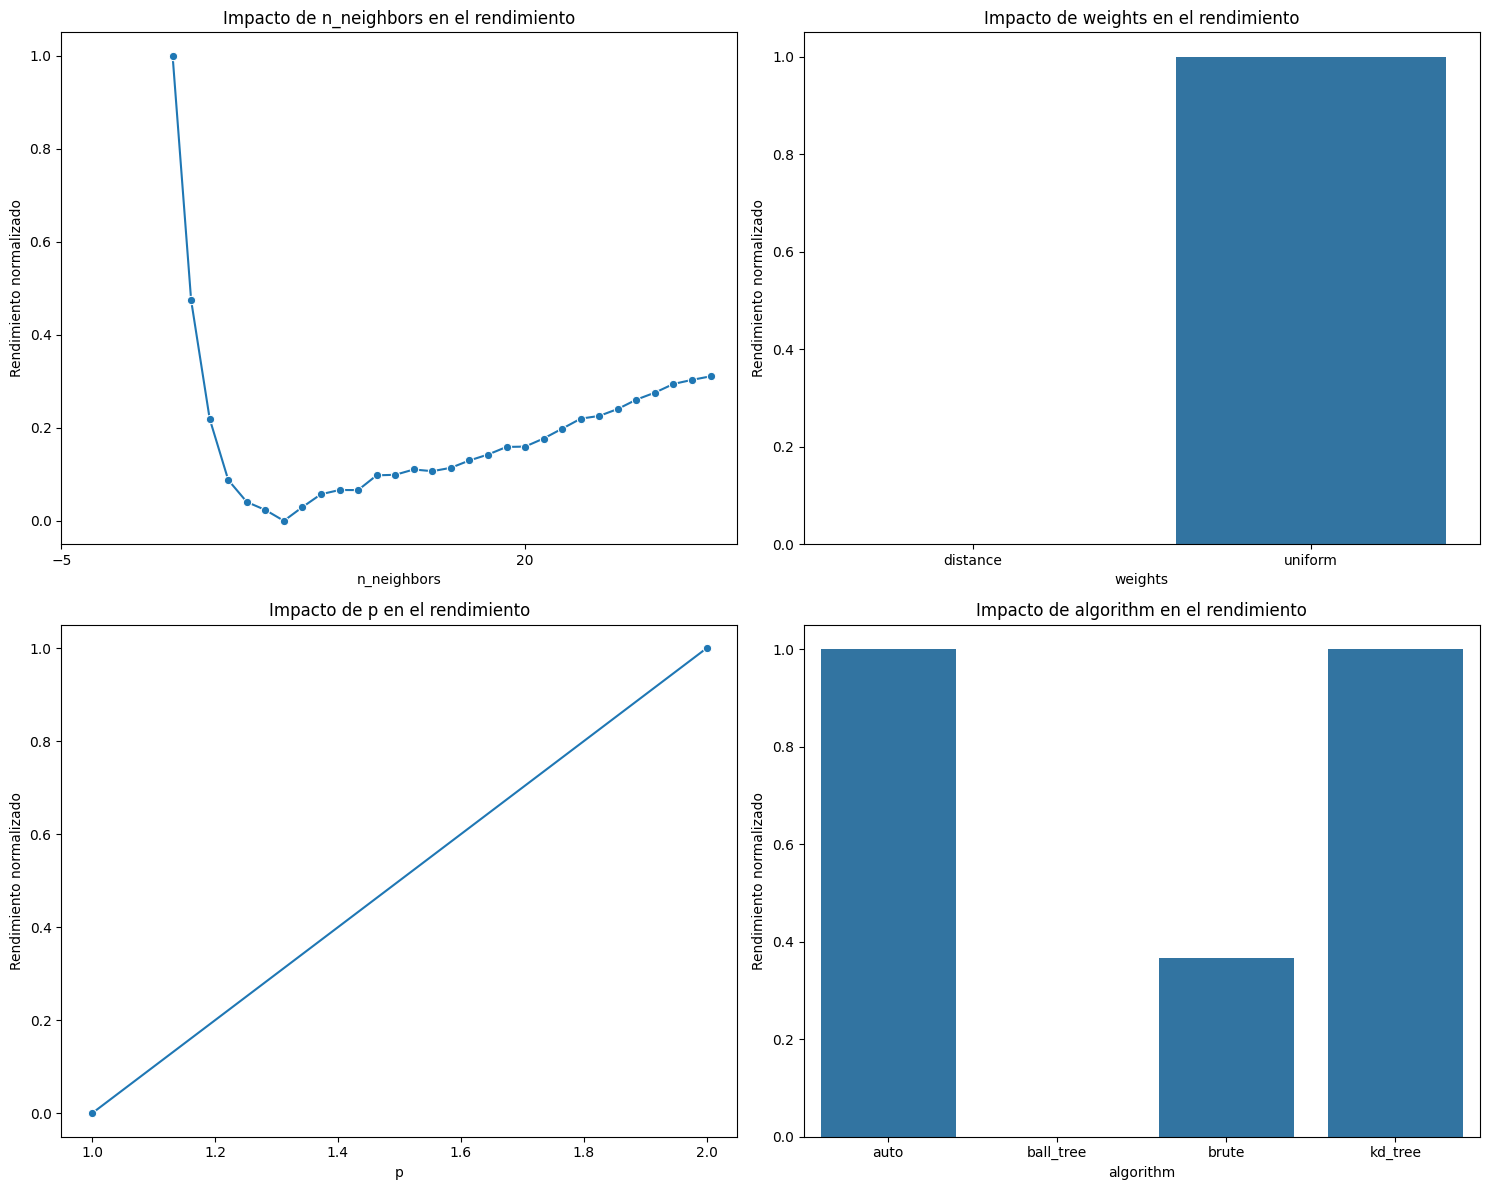

<Figure size 1200x600 with 0 Axes>

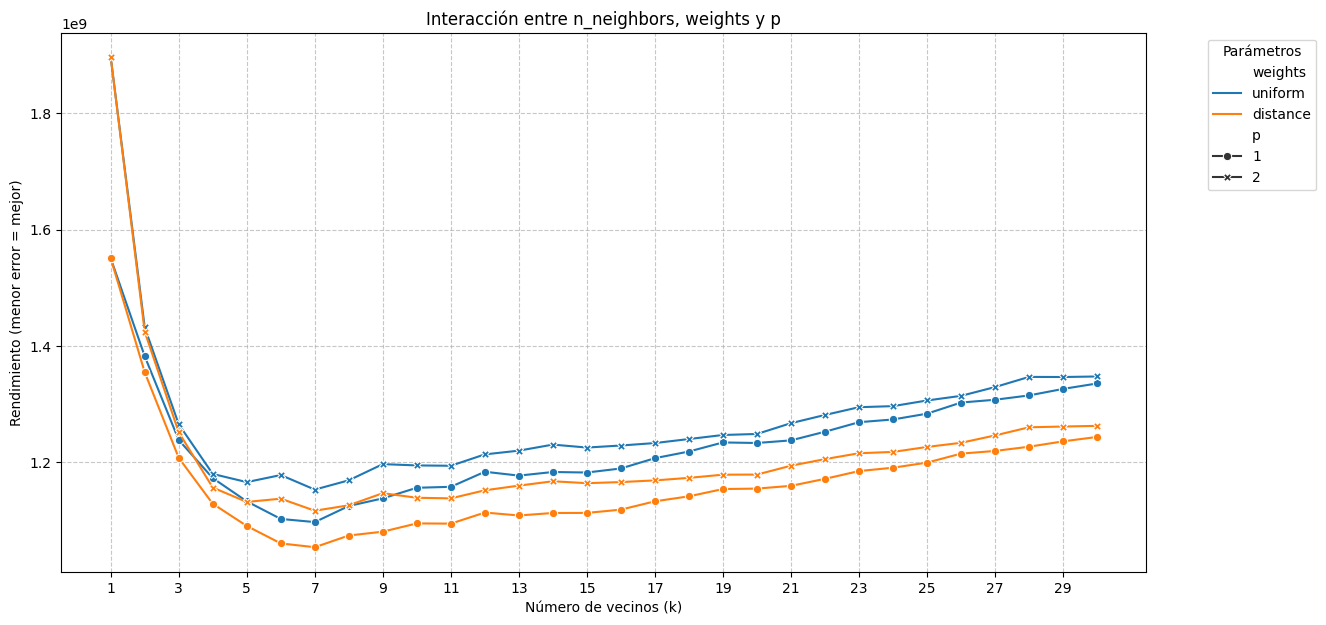

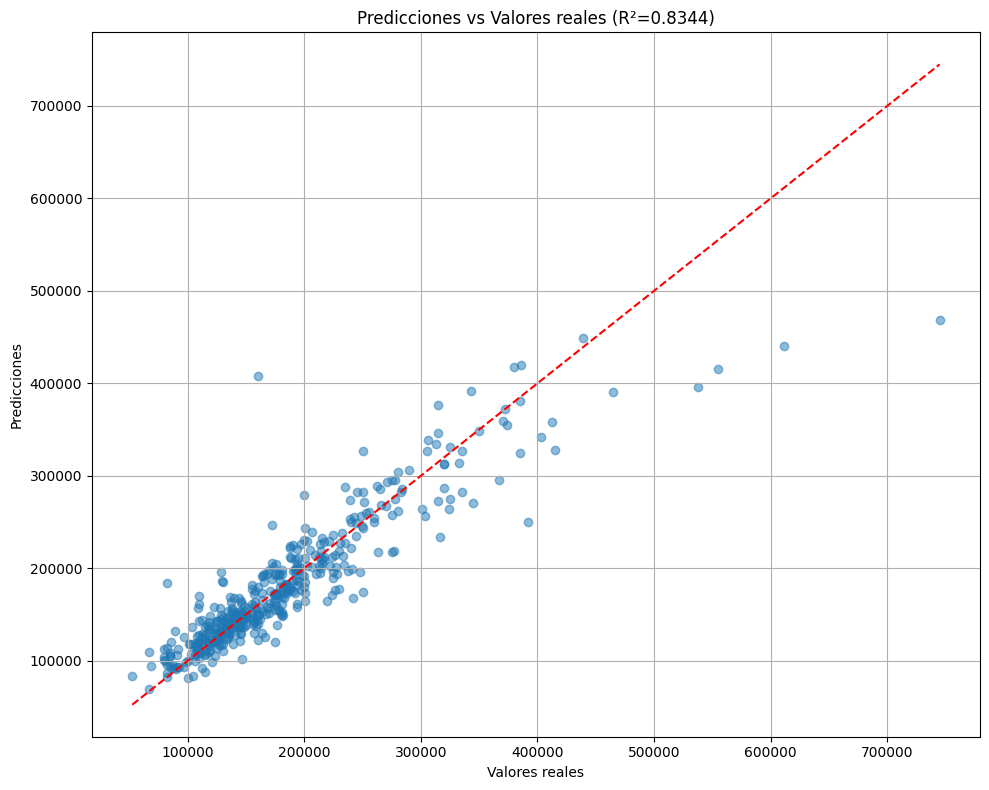

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import seaborn as sns

# Suponemos que grid_search ya está ajustado como en tu código

# Extraer resultados de la búsqueda de cuadrícula
results = pd.DataFrame(grid_search.cv_results_)

# Convertir neg_mean_squared_error a R²
# Nota: Esta es una aproximación, ya que GridSearchCV no calcula R² directamente
# Usaremos las predicciones del mejor modelo para cada combinación

# Función para crear visualizaciones para cada hiperparámetro
def plot_param_impact(param_name, grid_results, ax):
    # Agrupar resultados por el parámetro y calcular la media
    param_data = grid_results.groupby(f'param_{param_name}')['mean_test_score'].mean()
    
    # Convertir de neg_mean_squared_error a una escala comparable con R²
    # (valores más altos = mejor rendimiento)
    scores = -param_data
    
    # Normalizar para comparar entre parámetros
    min_score, max_score = scores.min(), scores.max()
    normalized_scores = (scores - min_score) / (max_score - min_score)
    
    # Graficar
    if isinstance(param_data.index[0], str):
        # Para parámetros categóricos como 'weights' o 'algorithm'
        sns.barplot(x=param_data.index, y=normalized_scores, ax=ax)
    else:
        # Para parámetros numéricos como 'n_neighbors' o 'p'
        sns.lineplot(x=param_data.index, y=normalized_scores, marker='o', ax=ax)
    
    ax.set_title(f'Impacto de {param_name} en el rendimiento')
    ax.set_ylabel('Rendimiento normalizado')
    ax.set_xlabel(param_name)
    
    # Para n_neighbors, mostrar menos etiquetas en el eje x para claridad
    if param_name == 'n_neighbors':
        ax.set_xticks(range(1, 31, 2))  # Muestra valores 1, 3, 5, 7, ..., 29


# Crear una figura con subplots para cada hiperparámetro
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

# Visualizar el impacto de cada hiperparámetro
plot_param_impact('n_neighbors', results, axs[0])
plot_param_impact('weights', results, axs[1])
plot_param_impact('p', results, axs[2])
plot_param_impact('algorithm', results, axs[3])

plt.tight_layout()

# Crear visualizaciones más detalladas para n_neighbors
# Este es generalmente el hiperparámetro más importante para KNN
plt.figure(figsize=(12, 6))

# Extraer resultados específicos para n_neighbors
n_data = []
for k in range(1, 31):
    # Filtrar resultados para este valor de k
    k_results = results[results['param_n_neighbors'] == k]
    # Agrupar por weights y p para ver la interacción
    for weight in ['uniform', 'distance']:
        for p_val in [1, 2]:
            subset = k_results[(k_results['param_weights'] == weight) & 
                              (k_results['param_p'] == p_val)]
            if not subset.empty:
                n_data.append({
                    'n_neighbors': k,
                    'weights': weight,
                    'p': p_val,
                    'score': -subset['mean_test_score'].mean()  # Convertir a positivo
                })

n_df = pd.DataFrame(n_data)

# Visualizar la interacción entre n_neighbors, weights y p
plt.figure(figsize=(14, 7))
sns.lineplot(x='n_neighbors', y='score', hue='weights', style='p', 
             markers=True, dashes=False, data=n_df)
plt.title('Interacción entre n_neighbors, weights y p')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Rendimiento (menor error = mejor)')
plt.xticks(range(1, 31, 2))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Parámetros', bbox_to_anchor=(1.05, 1), loc='upper left')

# Visualizar los mejores parámetros y su rendimiento
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)
print(f"R² con los mejores parámetros: {r2:.4f}")
print(f"RMSE con los mejores parámetros: {rmse:.2f}")

# Graficar las predicciones vs valores reales con el mejor modelo
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title(f'Predicciones vs Valores reales (R²={r2:.4f})')
plt.grid(True)
plt.tight_layout()